In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()


local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 9.953 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info  

In [2]:
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()
import pack_cuda_lut
pack_cuda_lut._ensure_initialized()
import lap_batch
lap_batch._ensure_initialized()


Compiling CUDA LUT kernel one-time only)
Detected GPU compute capability: 89 (arch=sm_89)
Compiling: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -lineinfo -arch=sm_89 -cubin /mnt/d//packing/temp/pack_cuda_lut_saved.cu -o /mnt/d//packing/temp/pack_cuda_lut.cubin
/mnt/d//packing/temp/pack_cuda_lut_saved.cu:5: warning: "M_PI" redefined
    5 | #define M_PI 3.14159265358979323846f
      | 
In file included from /usr/include/c++/13/cmath:47,
                 from /usr/include/c++/13/math.h:36,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/crt/math_functions.h:4577,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/crt/common_functions.h:303,
                 from /usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime.h:117,
                 from <command-line>:
/usr/include/math.h:1152: note: this is the location of the previous definition
 1152 | # define M_PI     

In [3]:
%load_ext pyinstrument

In [4]:

import pack_ga3
import time
runner = pack_ga3.baseline()
runner.ga.do_legalize = False
runner.ga.ga_base.do_legalize = False
runner.ga.ga_base.N_trees_to_do = 47
runner.n_generations = 5
print(type(runner.rough_relaxers[0].cost.costs[2]))
#runner.rough_relaxers[0].cost.costs[2].use_lookup_table = True
runner.rough_relaxers[0].cost.costs[2]._ensure_lut_initialized()
#runner.fine_relaxers[0].cost.costs[2].use_lookup_table = True
#runner.fine_relaxers[0].cost.costs[2]._ensure_lut_initialized()


<class 'pack_cost.CollisionCostExactSeparation'>
Loading cached lookup table from /mnt/d//packing/temp//lut_cache/exact_sep_Nx900_Ny900_Nt900_trimTrue_tree116323fb.lut_cache...
Successfully loaded cached lookup table


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0: Best costs = [[0.367199, 0.176687]]
Generation 1: Best costs = [[0.367199, 0.089671]]
Generation 2: Best costs = [[0.367199, 0.061913]]
Generation 3: Best costs = [[0.367199, 0.047377]]
Generation 4: Best costs = [[0.367199, 0.040778]]
Elapsed time: 12.488892793655396


_     ._   __/__   _ _  _  _ _/_   Recorded: 10:30:19  Samples:  11486
 /_//_/// /_\ / //_// / //_'/ //     Duration: 12.490    CPU time: 13.322
/   _/                      v5.1.1

Cell [6]

13.995 <module>  /tmp/ipykernel_31131/617319491.py:1
`- 13.995 Orchestrator.run  pack_ga3.py:1394
   |- 7.605 Orchestrator._relax  pack_ga3.py:1350
   |  `- 7.506 run_simulation_list  pack_dynamics.py:633
   |     `- 7.489 OptimizerBFGS.run_simulation  pack_dynamics.py:42
   |        `- 7.429 lbfgs  lbfgs_torch_parallel.py:382
   |           |- 4.131 [self]  lbfgs_torch_parallel.py
   |           `- 2.721 f_torch  pack_dynamics.py:68
   |              |- 1.953 Device.synchronize  <built-in>
   |              `- 0.589 CostCompound.compute_cost  pack_cost.py:50
   |                 `- 0.582 CostCompound._compute_cost  pack_cost.py:95
   |                    |- 0.434 CollisionCostExactSeparation.compute_cost  pack_cost.py:50
   |                    |  `- 0.302 CollisionCostExactSeparation._compute_cost  pack_cost.py:1000
   |                    |     `- 0.301 CollisionCostExactSeparation._compute_cost  pack_cost.py:391
   |                    |        `- 0.286 overlap_multi_ensemble  pack_cuda_lut.py:871
   |                    |           `- 0.245 _set_debug_mode  pack_cuda_lut.py:709
   |                    |              `- 0.236 set_constant  pack_cuda_lut.py:726
   |                    |                 `- 0.171 array  cupy/_creation/from_data.py:7
   |                    `- 0.145 [self]  pack_cost.py
   |- 3.521 GAMultiRing.apply_selection  pack_ga3.py:392
   |  `- 3.521 GAMultiRing._apply_selection  pack_ga3.py:572
   |     `- 3.521 GASinglePopulationOld.apply_selection  pack_ga3.py:392
   |        `- 3.521 GASinglePopulationOld._apply_selection  pack_ga3.py:1048
   |           |- 2.995 compute_genetic_diversity  kaggle_support.py:1225
   |           |  `- 2.960 compute_genetic_diversity_matrix  kaggle_support.py:1078
   |           |     `- 2.951 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
   |           |        |- 1.500 compute_diversity_shortcut_kernel  lap_batch.py:608
   |           |        |  |- 0.976 Device.synchronize  <built-in>
   |           |        |  `- 0.393 [self]  lap_batch.py
   |           |        |- 0.945 Device.synchronize  <built-in>
   |           |        `- 0.414 [self]  kaggle_support.py
   |           `- 0.145 compute_genetic_diversity_matrix  kaggle_support.py:1078
   |              `- 0.145 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
   |- 2.042 GAMultiRing.generate_offspring  pack_ga3.py:347
   |  `- 2.042 GAMultiRing._generate_offspring  pack_ga3.py:643
   |     `- 1.984 GASinglePopulationOld.generate_offspring  pack_ga3.py:347
   |        `- 1.892 GASinglePopulationOld._generate_offspring  pack_ga3.py:1162
   |           `- 1.681 MoveSelector.do_move_vec  pack_move.py:42
   |              `- 1.681 MoveSelector._do_move_vec  pack_move.py:83
   |                 |- 1.238 JiggleCluster.do_move_vec  pack_move.py:42
   |                 |  |- 0.339 JiggleCluster._do_move_vec  pack_move.py:171
   |                 |  |- 0.319 Crossover._do_move_vec  pack_move.py:307
   |                 |  `- 0.222 CrossoverStripe._do_move_vec  pack_move.py:542
   |                 `- 0.317 [self]  pack_move.py
   |- 0.342 GAMultiRing.initialize  pack_ga3.py:287
   |  `- 0.342 GAMultiRing._initialize  pack_ga3.py:630
   |     `- 0.336 GAMultiRing._initialize  pack_ga3.py:484
   |        `- 0.262 default_rng  cupy/random/__init__.py:20
   |- 0.277 GAMultiRing.score  pack_ga3.py:297
   |  `- 0.276 GAMultiRing._score  pack_ga3.py:497
   |     `- 0.246 GASinglePopulationOld.score  pack_ga3.py:297
   |        `- 0.221 GASinglePopulationOld._score  pack_ga3.py:782
   `- 0.184 GAMultiRing.reset  pack_ga3.py:292
      `- 0.184 GAMultiRing._reset  pack_ga3.py:494
         `- 0.184 GASinglePopulationOld.reset  pack_ga3.py:292
            `- 0.184 GASinglePopulationOld._reset  pack_ga3.py:769

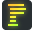

In [5]:
%%pyinstrument
kgs.profiling=True
t = time.time()
runner.run()
print("Elapsed time:", time.time() - t)


In [6]:
runner.ga.best_costs_per_generation[0][-1]


array([0.36719865, 0.04077817], dtype=float32)